# Keras

Keras es una biblioteca para manipular redes neuronales. Es una capa de alto nivel por arriba de Theano (o de TensorFlow).

## Ejemplo simple

Construcción de una red neuronal:

In [178]:
%matplotlib inline
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(output_dim=2, input_dim=5, activation="sigmoid"))
model.add(Dense(output_dim=1, activation="sigmoid"))

Podemos ver una descripción del modelo:

In [179]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_25 (Dense)                 (None, 2)             12          dense_input_13[0][0]             
____________________________________________________________________________________________________
dense_26 (Dense)                 (None, 1)             3           dense_25[0][0]                   
Total params: 15
____________________________________________________________________________________________________


Así como también podemos visualizarlo:

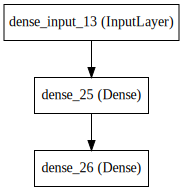

In [180]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Luego hay que compilar:

In [181]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Usamos un conjunto de datos de ejemplo:

In [182]:
import numpy as np

def dataset(n_train, n_test):
    n = n_train + n_test
    points = np.random.uniform(-3, 3, [n, 2])
    features = np.c_[points, points[:, 0]**2, points[:, 1]**2, points[:, 0] * points[:, 1]]
    labels = (np.linalg.norm(points, axis=1) > 2).astype(int)
    return (features[:n_train], labels[:n_train]), (features[n_train:], labels[n_train:])

(X_train, y_train), (X_test, y_test) = dataset(8000, 2000)

Entrenamos la red:

In [183]:
model.fit(X_train, y_train, nb_epoch=50, batch_size=32)

Epoch 1/50
8000/8000 [==============================] - 0s - loss: 0.6594 - acc: 0.6374     
Epoch 2/50
8000/8000 [==============================] - 0s - loss: 0.5829 - acc: 0.6590     
Epoch 3/50
8000/8000 [==============================] - 0s - loss: 0.5647 - acc: 0.6573     
Epoch 4/50
8000/8000 [==============================] - 0s - loss: 0.5497 - acc: 0.6813     
Epoch 5/50
8000/8000 [==============================] - 0s - loss: 0.5337 - acc: 0.7166     
Epoch 6/50
8000/8000 [==============================] - 0s - loss: 0.5163 - acc: 0.7474     
Epoch 7/50
8000/8000 [==============================] - 0s - loss: 0.4976 - acc: 0.7729     
Epoch 8/50
8000/8000 [==============================] - 0s - loss: 0.4779 - acc: 0.7999     
Epoch 9/50
8000/8000 [==============================] - 0s - loss: 0.4574 - acc: 0.8226     
Epoch 10/50
8000/8000 [==============================] - 0s - loss: 0.4362 - acc: 0.8429     
Epoch 11/50
8000/8000 [==============================] - 0s - loss: 0

Podemos evaluar y ver métricas:

In [184]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print()
print()
print('Valor de la función de costo: {}'.format(loss_and_metrics[0]))
print('Acierto: {}'.format(loss_and_metrics[1]))

  32/2000 [..............................] - ETA: 0s

Valor de la función de costo: 0.09746023839712142
Acierto: 0.9895


Y también podemos ver las clases predecidas y sus probablidades:

In [185]:
y_pred = model.predict_classes(X_test)
probability = model.predict_proba(X_test)

print(y_pred)
print(probability)

  32/2000 [..............................] - ETA: 0s[[1]
 [1]
 [1]
 ..., 
 [0]
 [1]
 [1]]
[[ 0.96933961]
 [ 0.97795302]
 [ 0.9794724 ]
 ..., 
 [ 0.25486836]
 [ 0.97937542]
 [ 0.93156236]]


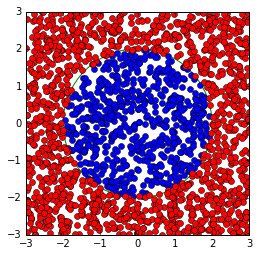

In [186]:
import matplotlib.pyplot as plt

def plot(inside, outside):
    if inside.any():
        plt.plot(inside[:, 0], inside[:, 1], 'bo')
    if outside.any():
        plt.plot(outside[:, 0], outside[:, 1], 'ro')
    circle = plt.Circle((0, 0), radius=2, color='g', fill=False)
    ax = plt.gca()
    ax.set_aspect(1)
    ax.add_patch(circle)
    plt.show()

points_test = X_test[:, :2]

inside = np.array([x for x, y in zip(points_test, y_pred) if y == 0])
outside = np.array([x for x, y in zip(points_test, y_pred) if y == 1])

plot(inside, outside)

## Funciones de costo disponibles

* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* binary_crossentropy
* categorical_crossentropy
* sparse_categorical_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

## Optimizadores disponibles

* SGD
* RMSprop
* Adagrad
* Adadelta
* Adam
* Adamax
* Nadam

También se puede instanciar "manualmente" el optimizador para ajustar parámetros como la constante de aprendizaje, el momento y la desaceleración de la constante de aprendizaje:

In [189]:
from keras.optimizers import SGD

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, decay=0.001), metrics=['accuracy'])

## Funciones de activación disponibles

* softmax
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* linear

## Compatibilidad con scikit-learn

Keras provee una API para usar los modelos como si fueran parte de scikit-learn:

In [193]:
from keras.wrappers import scikit_learn
from sklearn import cross_validation

classifier = scikit_learn.KerasClassifier(build_fn=lambda: model, nb_epoch=5)
# build_fn debe devolver un modelo compilado.

classifier.fit(X_train, y_train)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=3, shuffle=True)
results = cross_validation.cross_val_score(classifier, X_train, y_train, cv=kfold)
print()
print()
print('Acierto: {}'.format(results.mean()))

Epoch 1/5
8000/8000 [==============================] - 0s - loss: 0.0323 - acc: 0.9994     
Epoch 2/5
8000/8000 [==============================] - 0s - loss: 0.0323 - acc: 0.9995     
Epoch 3/5
8000/8000 [==============================] - 0s - loss: 0.0323 - acc: 0.9994     
Epoch 4/5
8000/8000 [==============================] - 0s - loss: 0.0323 - acc: 0.9994     
Epoch 5/5
8000/8000 [==============================] - 0s - loss: 0.0323 - acc: 0.9994     
Epoch 1/5
5333/5333 [==============================] - 0s - loss: 0.0332 - acc: 0.9991     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0332 - acc: 0.9989     
Epoch 3/5
5333/5333 [==============================] - 0s - loss: 0.0331 - acc: 0.9989     
Epoch 4/5
5333/5333 [==============================] - 0s - loss: 0.0331 - acc: 0.9987     
Epoch 5/5
5333/5333 [==============================] - 0s - loss: 0.0315 - acc: 0.9989     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0315 - acc: 

También está disponible la clase `KerasRegressor`. Con esto se pueden hacer cosas como usar `GridSearchCV` para buscar la combinación de parámetros que mejoran los resultados (valores de la constante de aprendizaje, momento, etc), así como también construir un pipeline en donde el modelo puede tomar datos a partir de otros modelos de scikit-learn.